<a href="https://colab.research.google.com/github/Tahir7044/machine-learning/blob/master/Bank_Turnover_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data_set=pd.read_csv("/content/Churn_Modelling.csv")

In [47]:
data_set.shape

(10000, 14)

In [48]:
data_set.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
data_set.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
sns.pairplot(data_set, palette="husl",hue="Exited",vars=["Age", "Balance","NumOfProducts","CreditScore","EstimatedSalary","Tenure"]);

In [0]:
x=data_set.drop(labels=['RowNumber', 'CustomerId', 'Surname','Exited'],axis=1)


In [51]:
print(x.shape)
print(x.columns)

(10000, 10)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [0]:
#handling catagorecal data
from sklearn.preprocessing import LabelEncoder

In [0]:
label=LabelEncoder()
x['Gender']=label.fit_transform(x["Gender"])
x["Geography"]=label.fit_transform(x["Geography"])
print(x.head())

In [0]:
x=pd.get_dummies(x,drop_first=True,columns=['Gender','Geography'])

In [0]:
x.head(10)

In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
y=data_set['Exited']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [57]:
print(x.shape)
print(y.shape)

(10000, 11)
(10000,)


In [0]:
x.head()

In [60]:
x.shape[1]

11

In [90]:
#model building
model=Sequential()
model.add(Dense(x.shape[1],activation='relu',input_dim=x.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 12,037
Trainable params: 12,037
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
history=model.fit(X_train,y_train.to_numpy(),batch_size=20,epochs=10,verbose=1)


Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 1s 146us/sample - loss: 0.4552 - accuracy: 0.8113
Epoch 2/10
7000/7000 [==============================] - 1s 105us/sample - loss: 0.3835 - accuracy: 0.8410
Epoch 3/10
7000/7000 [==============================] - 1s 103us/sample - loss: 0.3626 - accuracy: 0.8501
Epoch 4/10
7000/7000 [==============================] - 1s 99us/sample - loss: 0.3554 - accuracy: 0.8540
Epoch 5/10
7000/7000 [==============================] - 1s 101us/sample - loss: 0.3465 - accuracy: 0.8577
Epoch 6/10
7000/7000 [==============================] - 1s 99us/sample - loss: 0.3455 - accuracy: 0.8543
Epoch 7/10
7000/7000 [==============================] - 1s 99us/sample - loss: 0.3386 - accuracy: 0.8590
Epoch 8/10
7000/7000 [==============================] - 1s 99us/sample - loss: 0.3355 - accuracy: 0.8631
Epoch 9/10
7000/7000 [==============================] - 1s 101us/sample - loss: 0.3315 - accuracy: 0.8610
Epoch 10/10
7000/7000 [=====

In [93]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


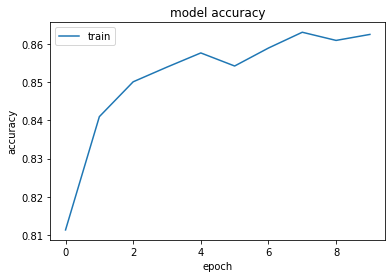

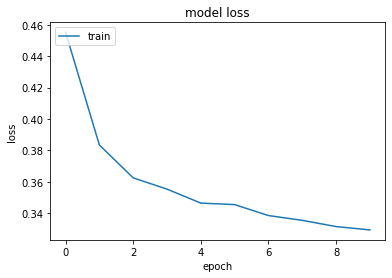

In [94]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred=model.predict_classes(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
results = confusion_matrix(y_test, y_pred)
print(results)


[[2277  139]
 [ 272  312]]


In [97]:
model.evaluate(X_test,y_test.to_numpy())

3000/3000 [==============================] - 0s 58us/sample - loss: 0.3395 - accuracy: 0.8630


[0.339473935564359, 0.863]

In [100]:
accuracy_score(y_test,y_pred)

0.863